## TP 5 : " Stokes Flow ".

---
Binôme : Khaled Ibrahim & Servranckx Christophe.

---

Le but de ce 5ème challenge est de résoudre l'écoulement de Stokes dans une cavité carrée en utilisant la formulation de la fonction de vorticité-flux introduite dans l'introduction de ce challenge.

Pour se faire, nous utiliserons quelques méthode de résolution numérique tel que la méthode de Jacobi, sa version compilée, etc. qui nous permettrons en outre, de nous rendre compte de l'efficacité de ces dernières tout comme nous avons put nous en rendre compte tout au long des notebooks de ce 5ème module. 

Finalement, nous nous intéresserons à la convergences de ces méthodes et à leur comportement qui, comme nous le verrons, est intimement lié à la physique du problème.

---

##### 1. Rappels et développement théorique.
---

L'écoulement de Stokes (également appelé "écoulement glissant) et son hypothèse nous offres un excellent moyen de simplifier les équations de Navier-Stokes régissant le mouvement d'un fluide dans l'approximation d'un milieu continu.

Notons tout de même que cette hypothèse consistant à supposer que l'on ai un nombre de reynolds $Re^{1}$ proche de 0 n'est pas incontournable pour résoudre le problème "Stokes flow". En effet, ce dernier peut-être résolu (par des méthodes qui ne seront pas abordées ici) pour des nombres de Reynolds de l'ordre de 100, 400 voir 1000.


---
###### [1] Le nombre de Reynolds $Re$ est donné par le rapport des termes de transport diffusif et convectif :  $Re = \frac{vL}{ \nu }$ où $\nu$ est la viscosité du fluide, $v$ sa vitesse.
---

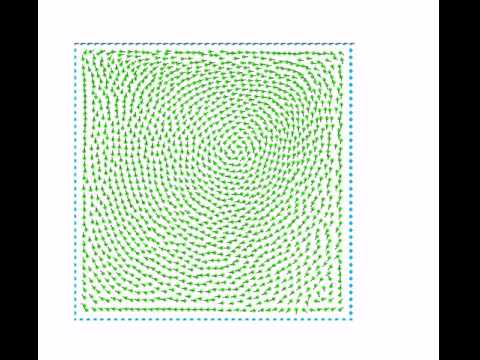

In [54]:
from IPython.display import YouTubeVideo
YouTubeVideo('VFwK2BsWcOc')

###### Figure 1. Video du problème Stokes flow (Lid Driven Cavity problem) résolu pour une valeur du nombre de Reynolds de $Re = 400$ par la méthode SPH (Smoothed Particle Hydrodynamics) détaillé dans le lien suivant fournit dans les sources.

---

A présent, redérivons succintement les fonctions de vorticité-flux comme nous l'avons vu dans l'introduction théorique de ce challenge. 

Débutons pour cela par les équations de Navier-Stokes pour un écoulement incompressible

\begin{equation}
\frac{\partial u}{\partial t} + u \cdot \nabla u = -\frac{1}{\rho}\nabla p + \nu\nabla^2 u
\end{equation}

et procédons à une mise à l'échelle de cette équation,

\begin{equation}→
Re \left(\frac{\partial u^*}{\partial t} + u^* \cdot \nabla u^* \right) = -\nabla p^* + \nabla^2 u^*
\end{equation}

L'équation de transport de vorticité pour l'écoulement de Stokes est alors obtenue en utilisant l'hypothèse Stokes d'un nombre de Reynolds proche de 0 permettant de se débarasser des termes non linéaire tout en procédant au remaniement de certain termes. Nous obtenons donc

\begin{equation}
\nabla ^2 \omega = 0
\end{equation}

$$
{}
$$

L'équation pour la fonction de courant 

\begin{equation}
\nabla^2 \psi = -\omega
\end{equation}

est quant à elle obtenue par une simple manipulation des relations qui définissent la fonction de courant, à savoir :

\begin{equation}
u = \frac{\partial \psi}{\partial y} \hspace{1.0cm} \text{   et   } \hspace{1.0cm} v = - \frac{\partial \psi}{\partial x}
\end{equation}

 et de la vorticité exprimée en 2d par :
 
\begin{equation}
\omega = \frac{\partial v}{\partial x} - \frac{\partial u}{\partial y}
\end{equation}

Nous obtenons donc le système suivant de deux équations couplées qui nous permet de décrire l'écoulement du fluide dans notre problème

$$
\left\{
\begin{array}{}
\Delta \omega = 0\\
\Delta \psi = - \omega
\end{array}
\right.
$$

Passons maintenant à la discrétisation de ces équations.

---

##### 2. Discrétisation des équations courant-vorticité et des conditions aux bords.

---

#### 2.1 Discrétisation des équations :
---

Nous disposons donc le système d'équations couplés suivant à discrétiser:

$$
\left\{
\begin{array}{}
\Delta \omega = 0    \hspace{3.5cm}  (1)\\
\Delta \psi = - \omega \hspace{3.0cm}  (2)
\end{array}
\right.
$$

L'équation (1) n'est rien d'autre qu'une équation de Laplace tandis que l'équation (2) correspond à une équation de Poisson dont le terme de source n'est autre que la fonction de vorticité $\omega$.
Par conséquent, la discrétisation de nos équations sera très similaire à ce que nous avons put voir dans les notebook de ce 5ème module.
Commençons par l'équation (1).

$$
{}
$$

* Discrétisation de l'équation (1):

À 2 dimension, notre équation est donnée par :

\begin{equation}
\hspace{1.0cm} \frac{\partial ^2 \omega}{\partial x^2} + \frac{\partial ^2 \omega}{\partial y^2} = 0
\end{equation}

Discrétisons cette dernière au moyen d'une différence centrale comme suit :

\begin{equation}
→ \frac{\omega^{k}_{i+1, j}  - 2\omega^{k}_{i,j}  + \omega^{k}_{i-1,j} }{\Delta x^2} + \frac{\omega^{k}_{i,j+1}  - 2\omega^{k}_{i,j}  + \omega^{k}_{i, j-1} }{\Delta y^2} = 0
\end{equation}

qui, lorsque $\Delta x^2 = \Delta y^2$ nous donne :

\begin{equation}
→ \omega^{k}_{i+1, j}   + \omega^{k}_{i-1,j} + \omega^{k}_{i,j+1}  + \omega^{k}_{i, j-1}- 4 \omega^{k}_{i,j} = 0
\end{equation}

ou encore, en procédant à quelques réarrangements,

\begin{equation}
→ \omega^{k}_{i,j} = \frac{1}{4} \left(\omega^{k}_{i,j-1} + \omega^k_{i,j+1} + \omega^{k}_{i-1,j} + \omega^k_{i+1,j} \right)
\end{equation}

$$
{}
$$

* Discrétisation de l'équation (2):

À 2 dimension, notre équation est donnée par :

\begin{equation}
\frac{\partial ^2 \psi}{\partial x^2} + \frac{\partial ^2 \psi}{\partial y^2} = - \omega
\end{equation}

Discrétisons cette équation de Poisson comme on l'a vu dans le second notebook de ce module, e.g, au moyen d'une diférence centrale pour les dérivées et avec $- \omega$ comme terme de source :


\begin{equation}
→ \frac{\psi_{i+1,j}^{k}-2\psi_{i,j}^{k}+\psi_{i-1,j}^{k}}{\Delta x^2}+\frac{\psi_{i,j+1}^{k}-2 \psi_{i,j}^{k}+\psi_{i,j-1}^{k}}{\Delta y^2} = -  \omega_{i,j}^{k}
\end{equation}

Or nous avons ici que $\Delta x^2 = \Delta y^2$

\begin{equation}
→ \frac{\psi_{i+1,j}^{k}-2\psi_{i,j}^{k}+\psi_{i-1,j}^{k}}{\Delta x^2}+\frac{\psi_{i,j+1}^{k}-2 \psi_{i,j}^{k}+\psi_{i,j-1}^{k}}{\Delta x^2} = -  \omega_{i,j}^{k}
\end{equation}

On fait alors passer le delta dans le membre de droite,

\begin{equation}
→ \psi_{i+1,j}^{k} - 4\psi_{i,j}^{k}+ \psi_{i-1,j}^{k} + \psi_{i,j+1}^{k} + \psi_{i,j-1}^{k} = - \omega_{i,j}^{k} \Delta x^2
\end{equation}

et on isole finalement $\psi_{i,j}^{k}$,

$$
\begin{array}{}
→ \psi_{i,j}^{k} = \frac{1}{4} \left( \psi_{i+1,j}^{k} + \psi_{i-1,j}^{k} + \psi_{i,j+1}^{k} + \psi_{i,j-1}^{k} + \omega_{i,j}^{k} \Delta x^2 \right)
\end{array}
$$

---
#### 2.2 Discrétisation des conditions aux bords :
---
$$
{}
$$


#### Conditions aux bords de Neumann :
---

* Pour la fonction de courant $\psi$ :

$$
\left\{
\begin{array}{}
\frac{\partial \psi}{\partial x} = 0 \hspace{1.0cm} \text{en $x = 0$}\\
\frac{\partial \psi}{\partial x} = 0 \hspace{1.0cm} \text{en $x = l$}\\
\frac{\partial \psi}{\partial y} = 0 \hspace{1.0cm} \text{en $y = 0$}\\
\frac{\partial \psi}{\partial y} = 1 \hspace{1.0cm} \text{en $y = h$}\\
\end{array}
\right.
$$

$$
{}
$$

* Pour la fonction de vorticité $\omega$ :

Commençons par le bord supérieur. Pour cela, développons quelque peu le raisonnement aborder dans les rappels théoriques en commençant par discrétiser, au moyen d'un différence centrale du second ordre, $\omega_j$:

\begin{equation}
→ \omega_j = - \left(\frac{\psi_{j+1} - 2\psi_j + \psi_{j-1}}{\Delta y^2}\right)
\end{equation}

Nous allons ensuite utiliser une discrétisation du 3e ordre le long du bord supérieur. Cette discrétisation s'opère en prenant 3 points proches du bord comme illustré sur la figure 2 ci-dessous:

---

![Image](./figures/bord_sup.png)

---
###### Figure 2. Esquisse de la discrétisation de points prit de part et d'autre du bord supérieur du domaine

$$
{}
$$

La fonction de courant $\psi$ est alors développée en série de puissance en ces 3 points :

$$
\begin{array}{}
\psi (y+ \Delta y) = \psi (y) + \frac{\partial \psi}{\partial y} \Delta y+ \frac{1}{2} \frac{\partial ^2 \psi}{\partial y^2} \Delta y^2 + \frac{1}{6} \frac{\partial ^3 \psi}{\partial y^3} \Delta y^3 + \mathcal{O}(\Delta y^4) \hspace{0.7cm} (i)\\
\psi (y- \Delta y) = \psi (y) - \frac{\partial \psi}{\partial y} \Delta y+ \frac{1}{2} \frac{\partial ^2 \psi}{\partial y^2} \Delta y^2 - \frac{1}{6} \frac{\partial ^3 \psi}{\partial y^3} \Delta y^3 + \mathcal{O}(\Delta y^4) \hspace{0.7cm} (ii)\\
\psi (y- 2 \Delta y) = \psi (y) - 2 \frac{\partial \psi}{\partial y} \Delta y+ 2 \frac{\partial ^2 \psi}{\partial y^2} \Delta y^2 - \frac{4}{3} \frac{\partial ^3 \psi}{\partial y^3} \Delta y^3 + \mathcal{O}(\Delta y^4) \hspace{0.1cm} (iii)\\
\end{array}
$$

$$
{}
$$


Ensuite, nous multiplions (i) par a, (ii) par b et (iii) par c et nous sommons les termes en les dérivées premières, seconde et troisième en imposant que ces trois somme valent, respectivement 1, 0 et 0 et ce afin de ne conserver au final que les dérivées première.

Nous avons donc le système suivant à résoudre :

$$
\left\{
\begin{array}{}
a - b - 2c = 1\\
\frac{1}{2}a + \frac{1}{2}b + 2c =0\\
\frac{1}{6}a - \frac{1}{6}b - \frac{4}{3} c =0
\end{array}
\right.
$$

La résolution de ce système nous fournit alors trois coefficients qui lorsque l'on somme (i), (ii) et (iii) annule comme souhaité les termes en les dérivées seconde et troisième. Nous obtenons ainsi 

\begin{equation}
\hspace{-1.5cm}(i) + (ii) + (iii) : \hspace{0.5cm}\frac{1}{3}\psi_{j+1} - \psi_{j-1} + \frac{1}{6}\psi_{j-2} = - \frac{1}{2}\psi_{j} + \left. \frac{\partial \psi}{\partial y}\right|_j \Delta y
\end{equation}

dès lors

\begin{equation}
→ \left.\frac{\partial \psi}{\partial y}\right|_j = \frac{2\psi_{j+1} - 6\psi_{j-1} + \psi_{j-2} + 3\psi_j}{6 \Delta y}
\end{equation}

où nous avons

$$
\begin{array}{}
\left.\frac{\partial \psi}{\partial y}\right|_j = u_j
\end{array}
$$

Isolons alors $\psi_{j+1}$ (la valeur de $\psi$ hors du domaine) pour obtenir ce dernier en fonction de points du domaine uniquement:

\begin{equation}
\psi_{j+1} = \frac{6\Delta y u_j + 6 \psi_{j-1} - \psi_{j-2} - 3\psi_j}{2}
\end{equation}

Injectons ceci dans l'expression discrétisée de $\omega$ pour finalement obtenir:

$$
\begin{array}{}
\omega_{i,j} = -\frac{1}{2 \Delta y^2} (8\psi_{i, j-1} - \psi_{i, j-2}) - \frac{3u_j}{\Delta y} + \mathcal{O}(\Delta y^2)
\end{array}
$$

$$
{}
$$

La conditions au bord du bord supérieur étant fait, nous pouvons attaquer les 3 autres bords. Brièvement, en prenant les points repris sur la figure 3, 

---

![Image](./figures/bords.png)

---
###### Figure 3. Esquisse de la discrétisation de points prit de part et d'autre des bords inférieur, gauche et droit du domaine

$$
{}
$$

et en procédant similairement en veillant à isoler le point hors du domaine qui diffère d'un bord à l'autre tout en appliquant la condition au bord suivante 

$$
\begin{array}{}
\left.\frac{\partial \psi}{\partial y}\right|_j = 0
\end{array}
$$

Nous obtenons finalement, en se souvenant que dans notre cas : $\Delta x^2 = \Delta y^2$ :

$$
\left\{
\begin{array}{}
\omega_{i,j} = -\frac{1}{2 \Delta y^2} (8\psi_{i, j+1} - \psi_{i, j+2}) - \frac{3}{\Delta y} + \mathcal{O}(\Delta ^2) \hspace{1.5cm} \text{(bord inférieur)}\\
\omega_{i,j} = -\frac{1}{2 \Delta x^2} (8\psi_{i-1, j} - \psi_{i-2, j}) - \frac{3}{\Delta x} + \mathcal{O}(\Delta ^2) \hspace{1.5cm} \text{(bord droit)}\\
\omega_{i,j} = -\frac{1}{2 \Delta x^2} (8\psi_{i-1, j} - \psi_{i-2, j}) - \frac{3}{\Delta x} + \mathcal{O}(\Delta ^2) \hspace{1.5cm} \text{(bord gauche)}\\
\end{array}
\right.
$$

##### 2. Résolution du Problème

#### 2.1 Méthode de Jacobi.

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot, cm
from math import pi
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
def L1norm(new, old):
    norm = numpy.sum(numpy.abs(new-old))
    #normal = norm/numpy.sum(old*old)
    return norm

In [3]:
def jacobi(om, psi, d, l1_target):
    '''Résoud itérativement le système d'équations formé par l'équation de
    Laplace pour omega et l'équation de Poisson pour psi en utilisant la
    méthode de Jacobi.
    
    Paramètres:
    ----------
    om: Tableau à 2D de float ("nombre à virgule flottante")
        distribution initiale de la voriticité omega
    psi: Tableau à 2D de float
        distribution initiale de la fonction de courant psi
    l1_target: float 
        Objectif pour la différence entre deux solutions consécutives
        (critère d'arrêt)
    d: float
        intervalle entre deux points de notre réseau de points
        
    Retournes:
    -------
    om: Tableau à 2D de float
        Distribution de omega après relaxation.
    '''
    
    norme_om = 1
    norme_psi = 1
    omn = numpy.empty_like(om)
    psid = numpy.empty_like(psi)
    iterations = 0
    l1_conv=[]
    
    while norme_psi > l1_target and norme_om > l1_target:
        omn = om.copy()
        psid = psi.copy()
        
        # On calcul nos nouvelles valeurs de omega
        om[1:-1,1:-1] = 0.25 * (omn[1:-1,2:] + omn[1:-1, :-2]\
                             + omn[2:, 1:-1] + omn[:-2, 1:-1])
    
        
        # On impose les conditions aux bords de Neumann
        om[-1,:] = -0.5/(d**2)*(8*psi[-2,:]-psi[-3,:])-(3/d)  # Bord supérieur
        om[0,:] = -0.5/(d**2)*(8*psi[1,:]-psi[2,:])           # Bord inférieur
        om[:,-1] = -0.5/(d**2)*(8*psi[:,-2]-psi[:,-3])        # Bord droit
        om[:,0] = -0.5/(d**2)*(8*psi[:,1]-psi[:,2])           # Bord gauche
        
        # On calcul nos nouvelles valeurs de psi
        psi[1:-1,1:-1] = 0.25 * (psid[1:-1,2:] + psid[1:-1,:-2]\
                              + psid[2:,1:-1] + psid[:-2,1:-1]\
                              + om[1:-1,1:-1] * d**2)

        #Calcul et sauvegarde des normes
        norme_psi = L1norm(psi,psid)
        norme_om  = L1norm(om,omn)
        iterations += 1
        l1_conv.append(norme_psi)

    return psi, om, iterations, l1_conv

def de la fonction de plot du graphique 3D

In [4]:
def plot_3D(x, y, p):
    '''Créer un graphique en 3D avec les limites et l'angle de vue approprié

    Paramètres:
    ----------
    x: Tableau de float ("nombre à virgule flottante")
        Coordonnées nodales en x
    y: Tableau de float ("nombre à virgule flottante")
        Coordonnées nodales en x
    psi: Tableau à 2D de float
        Distribution de p calculée
    
    '''
    
    fig = pyplot.figure(figsize=(11,7), dpi=100)
    ax = fig.gca(projection='3d')
    X,Y = numpy.meshgrid(x,y)
    surf = ax.plot_surface(X,Y,p[:], rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=0, antialiased=False)

    pyplot.title("Fonction de courant $\psi$", fontsize = 25)
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')
    ax.view_init(30,45)

Initialisations des paramètres et conditions initiaux ainsi que des conditions aux bords.

In [5]:
#Initialisation des paramètres initiaux
nx = 41
ny = 41
l = 1.
h = 1.
d = l/(nx-1)       # delta
l1_target = 1e-6   # 

#Conditions initiales
psi = numpy.zeros((ny,nx))
om  = numpy.zeros((ny,nx))

# Bord supérieur
om[-1,:] = -0.5/(d**2)*(8*psi[-2,:]-psi[-3,:])-(3/d) 
                                                                       
# Bord inférieur
om[0,:] = -0.5/(d**2)*(8*psi[1,:]-psi[2,:])

# Bord droit
om[:,-1] = -0.5/(d**2)*(8*psi[:,-2]-psi[:,-3])
        
# Bord gauche
om[:,0] = -0.5/(d**2)*(8*psi[:,1]-psi[:,2])


#Aide au traçage
x = numpy.linspace(0,l,nx)
y = numpy.linspace(0,h,ny)

Vérification de la bonne implémentation des conditions initiales et aux bords 

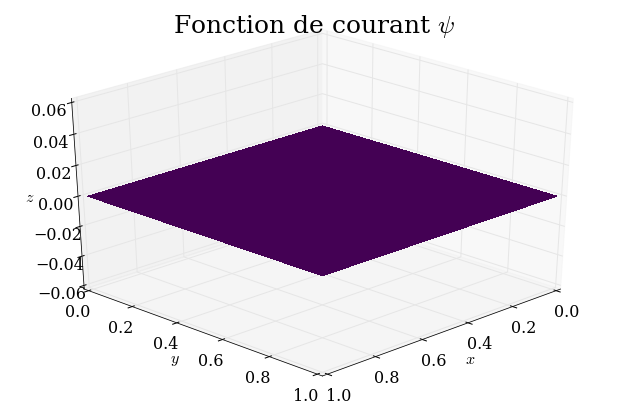

In [6]:
plot_3D(x,y,psi)

Appel de notre fonction.

In [7]:
psi, om, iterations, l1_conv= jacobi(om.copy(), psi.copy(), d, l1_target)

print("La méthode de Jacobi prend {} itérations à la tolérance {}".format(iterations, l1_target))

La méthode de Jacobi prend 2771 itérations à la tolérance 1e-06


Réalisation du graphique à partir de notre fonction.

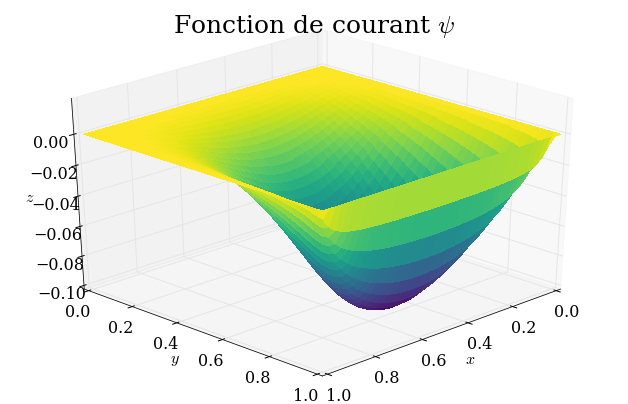

In [8]:
plot_3D(x,y,psi)

Vérification visuelle de notre solution au moyen du graphique en 2D.

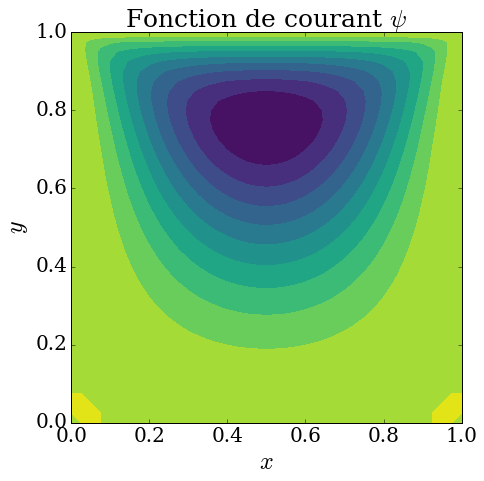

In [9]:
pyplot.figure(figsize=(7,7))
pyplot.contourf(x,y,psi,10,cmap=cm.viridis)
pyplot.title("Fonction de courant $\psi$", fontsize = 25)
pyplot.xlabel('$x$', fontsize=24)
pyplot.ylabel('$y$', fontsize=24)
pyplot.tick_params(axis='both',labelsize=20)

Ressortons maintenant les solutions recherchée.

In [10]:
psi_max = 0
om_max = 0

for i in range (nx):
    for j in range (ny):
        
        if abs(psi[j,i]) > psi_max:      # si psi_max est strictement plus petite que la fonction de courant de l'étape n alors:
            psi_max = abs(psi[j,i])      # notre nouvelle valeur maximale de la fonction de courant
        
        if abs(om[j,i]) > om_max:
            om_max = abs(om[j,i])

            
print("→ La valeur maximale de la valeur absolue de la fonction de courant,    psi, est :",round(psi_max,4) ,"\n")
print("→ La valeur maximale de la valeur absolue de la fonction de vorticité,   omega, est :",round(om_max,4))

→ La valeur maximale de la valeur absolue de la fonction de courant,    psi, est : 0.0998 

→ La valeur maximale de la valeur absolue de la fonction de vorticité,   omega, est : 78.1927


Et les 6 nombres désiré.

In [11]:
n=[]
n= numpy.round(psi[32,::8], 4)

for i in range(6):
    if i<1:
        print("→ Le", i+1,"er nombre recherché est :",n[i] ,"\n")
    elif i<=6:
        print("→ Le", i+1,"ème nombre recherché est :",n[i] ,"\n")

→ Le 1 er nombre recherché est : 0.0 

→ Le 2 ème nombre recherché est : -0.0575 

→ Le 3 ème nombre recherché est : -0.0944 

→ Le 4 ème nombre recherché est : -0.0944 

→ Le 5 ème nombre recherché est : -0.0575 

→ Le 6 ème nombre recherché est : 0.0 



#### 2.2 Méthode de Jacobi compilée.

Tentative de compilation de la méthode de Jacobi.
Import de la librairie utile.

In [12]:
import numba
from numba import jit

Implémentation de la fonction reprenant les conditions aux bords.

In [13]:
@jit(nopython=True)
def CB_Neuman(psi, om):

    for i in range(1,nx-1):
        om[-1,i] = -0.5/(d**2)*(8*psi[-2,i]-psi[-3,i])-(3/d) # Bord supérieur
        om[0,i] = -0.5/(d**2)*(8*psi[1,i]-psi[2,i])          # Bord inférieur

    for j in range(1,ny-1):
        om[j,-1] = -0.5/(d**2)*(8*psi[j,-2]-psi[j,-3])       # Bord droit
        om[j,0] = -0.5/(d**2)*(8*psi[j,1]-psi[j,2])          # Bord gauche

    return om

In [14]:
@jit(nopython=True)
def jacobi_compil(om, omn, psi, psid, d, l1_target):
    '''Résoud le système d'équations formé par l'équation de
    Laplace pour omega et l'équation de Poisson pour psi en utilisant la
    méthode de Jacobi avec un stencil à 5 points.
    
    Paramètres:
    ----------
    om: Tableau à 2D de float ("nombre à virgule flottante")
        distribution initiale de la voriticité omega
    omn: Tableau à 2D de float
        Tableau alloué pour la distribution précédente de om
    psi: Tableau à 2D de float
        distribution initiale de la fonction de courant psi
    psid: Tableau à 2D de float
        Tableau alloué pour la distribution précédente de psi
    d: float
        intervalle entre deux points de notre réseau de points
    l1_target: float 
        Critère d'arrêt
        
    Retournes:
    -------
    om: Tableau à 2D de float
        Distribution de omega après relaxation.
    psi: Tableau à 2D de float
        Distribution de psi après relaxation.
    '''


    omn = numpy.empty_like(om)
    psid = numpy.empty_like(psi)
    iterations = 0
    iter_diff_psi = l1_target+1 #init iter_diff to be larger than l1_target
    iter_diff_om = l1_target+1 #init iter_diff to be larger than l1_target
    ny, nx = psi.shape
    l1_diff_psi = numpy.zeros(3000)
    l1_diff_om = numpy.zeros(3000)
    
    
    while iter_diff_psi > l1_target and iter_diff_om > l1_target:
        omn = om.copy()
        psid = psi.copy()
        
        for j in range(ny):
            for i in range(nx):
                psid[j,i] = psi[j,i]
                omn[j,i] = om[j,i]
                
        iter_diff_psi = 0.0
        iter_diff_om = 0.0
        
        # On calcul nos nouvelles valeurs de omega
        for j in range(1,ny-1):
            for i in range(1,nx-1):
                om[j,i] = 0.25 * (omn[j,i-1] + omn[j,i+1]\
                              + omn[j-1,i]  + omn[j+1,i])
                
        
        # On impose les conditions aux bords de Neumann
        CB_Neuman(psi, om)   
            
            
        # On calcul nos nouvelles valeurs de psi
        for j in range(1,ny-1):
            for i in range(1,nx-1):
                psi[j,i] = 0.25 * (psid[j,i-1] + psid[j,i+1]\
                                + psid[j-1,i]  + psid[j+1,i] + om[j,i] * d**2)
            
        #Calcul et sauvegarde des normes    
        for j in range(ny):
            for i in range(nx):
                iter_diff_psi += abs(psi[j,i] - psid[j,i])
                iter_diff_om += abs(om[j,i] - omn[j,i])
        

        l1_diff_psi[iterations] = iter_diff_psi
        l1_diff_om[iterations] = iter_diff_om
        iterations += 1    
 
    return psi, om, iterations, l1_diff_psi

In [15]:
#Conditions initiales
psi = numpy.zeros((ny,nx))
om  = numpy.zeros((ny,nx))

# Bord supérieur
om[-1,:] = -0.5/(d**2)*(8*psi[-2,:]-psi[-3,:])-(3/d) 
                                                                       
# Bord inférieur
om[0,:] = -0.5/(d**2)*(8*psi[1,:]-psi[2,:])

# Bord droit
om[:,-1] = -0.5/(d**2)*(8*psi[:,-2]-psi[:,-3])
        
# Bord gauche
om[:,0] = -0.5/(d**2)*(8*psi[:,1]-psi[:,2])

In [16]:
psi, om, iterations, l1_diff_psiJ = jacobi_compil(om.copy(), om.copy(), psi.copy(), psi.copy(), d, l1_target)

print("La méthode de Jacobi compilée prend {} itérations à la tolérance {}".format(iterations, l1_target))

La méthode de Jacobi compilée prend 2771 itérations à la tolérance 1e-06


In [17]:
%%timeit
jacobi_compil(om.copy(), om.copy(), psi.copy(), psi.copy(), d, l1_target)

The slowest run took 11.50 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 33.7 µs per loop


In [18]:
%%timeit
jacobi(om.copy(), psi.copy(), d, l1_target)

The slowest run took 11.03 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 184 µs per loop


In [19]:
psi_max = 0
om_max = 0

for i in range (nx):
    for j in range (ny):
        
        if abs(psi[j,i]) > psi_max:      # si psi_max est strictement plus petite que la fonction de courant de l'étape n alors:
            psi_max = abs(psi[j,i])      # notre nouvelle valeur maximale de la fonction de courant
        
        if abs(om[j,i]) > om_max:
            om_max = abs(om[j,i])

            
print("→ La valeur maximale de la valeur absolue de la fonction de courant,    psi, est :",round(psi_max,4) ,"\n")
print("→ La valeur maximale de la valeur absolue de la fonction de vorticité,   omega, est :",round(om_max,4),"\n")

→ La valeur maximale de la valeur absolue de la fonction de courant,    psi, est : 0.0998 

→ La valeur maximale de la valeur absolue de la fonction de vorticité,   omega, est : 78.1927 



In [20]:
n=[]
n= numpy.round(psi[32,::8], 4)

for i in range(6):
    if i<1:
        print("→ Le", i+1,"er nombre recherché est :",n[i] ,"\n")
    elif i<=6:
        print("→ Le", i+1,"ème nombre recherché est :",n[i] ,"\n")

→ Le 1 er nombre recherché est : 0.0 

→ Le 2 ème nombre recherché est : -0.0575 

→ Le 3 ème nombre recherché est : -0.0944 

→ Le 4 ème nombre recherché est : -0.0944 

→ Le 5 ème nombre recherché est : -0.0575 

→ Le 6 ème nombre recherché est : 0.0 



#### 2.3 Méthode Gauss-Seidel.

In [21]:
@jit(nopython=True)
def gauss_seidel(om, omn, psi, psid, d, l1_target):
    '''Résoud itérativement le système d'équations formé par l'équation de
    Laplace pour omega et l'équation de Poisson pour psi en utilisant la
    méthode de Gauss-Seidel avec un stencil à 5 points.
    
    Paramètres:
    ----------
    om: Tableau à 2D de float ("nombre à virgule flottante")
        distribution initiale de la voriticité omega
    omn: Tableau à 2D de float
        Tableau alloué pour la distribution précédente de om
    psi: Tableau à 2D de float
        distribution initiale de la fonction de courant psi
    psid: Tableau à 2D de float
        Tableau alloué pour la distribution précédente de psi
    d: float
        intervalle entre deux points de notre réseau de points
    l1_target: float 
        Critère d'arrêt
        
    Retournes:
    -------
    om: Tableau à 2D de float
        Distribution de omega après relaxation.
    psi: Tableau à 2D de float
        Distribution de psi après relaxation.
    '''

    omn = numpy.empty_like(om)
    psid = numpy.empty_like(psi)
    iterations = 0
    iter_diff_psi = l1_target+1 #init iter_diff to be larger than l1_target
    iter_diff_om = l1_target+1 #init iter_diff to be larger than l1_target
    ny, nx = psi.shape
    l1_diff_psi = numpy.zeros(3000)
    l1_diff_om = numpy.zeros(3000)
    
    
    while iter_diff_psi > l1_target and iter_diff_om > l1_target:
        omn = om.copy()
        psid = psi.copy()
        
        for j in range(ny):
            for i in range(nx):
                psid[j,i] = psi[j,i]
                omn[j,i] = om[j,i]
                
        iter_diff_psi = 0.0
        iter_diff_om = 0.0
        
        
        for j in range(1,ny-1):
            for i in range(1,nx-1):
                om[j,i] = 0.25 * (om[j,i-1] + om[j,i+1]\
                              + om[j-1,i]  + om[j+1,i])
                
        
        # On impose les conditions aux bords de Neumann
        CB_Neuman(psi, om) 
            
        
        for j in range(1,ny-1):
            for i in range(1,nx-1):
                psi[j,i] = 0.25 * (psi[j,i-1] + psi[j,i+1]\
                                + psi[j-1,i]  + psi[j+1,i] + om[j,i] * d**2)

            
        #Calcul et sauvegarde des normes    
        for j in range(ny):
            for i in range(nx):
                iter_diff_psi += abs(psi[j,i] - psid[j,i])
                iter_diff_om += abs(om[j,i] - omn[j,i])
        

        l1_diff_psi[iterations] = iter_diff_psi
        l1_diff_om[iterations] = iter_diff_om
        iterations += 1    
          
    return psi, om, iterations, l1_diff_psi

In [22]:
#Conditions initiales
psi = numpy.zeros((ny,nx)) ##
om  = numpy.zeros((ny,nx))

# Bord supérieur
om[-1,:] = -0.5/(d**2)*(8*psi[-2,:]-psi[-3,:])-(3/d) 
                                                                       
# Bord inférieur
om[0,:] = -0.5/(d**2)*(8*psi[1,:]-psi[2,:])

# Bord droit
om[:,-1] = -0.5/(d**2)*(8*psi[:,-2]-psi[:,-3])
        
# Bord gauche
om[:,0] = -0.5/(d**2)*(8*psi[:,1]-psi[:,2])

In [23]:
psi, om, iterations, l1_diff_psiGS = gauss_seidel(om.copy(), om.copy(), psi.copy(), psi.copy(), d, l1_target)

print("La méthode de Gauss-seidel prend {} itérations à la tolérance {}".format(iterations, l1_target))

La méthode de Gauss-seidel prend 1410 itérations à la tolérance 1e-06


In [24]:
%%timeit
gauss_seidel(om.copy(), om.copy(), psi.copy(), psi.copy(), d, l1_target)

The slowest run took 9.60 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 47.9 µs per loop


In [25]:
psi_max = 0
om_max = 0

for i in range (nx):
    for j in range (ny):
        
        if abs(psi[j,i]) > psi_max:      # si psi_max est strictement plus petite que la fonction de courant de l'étape n alors:
            psi_max = abs(psi[j,i])      # notre nouvelle valeur maximale de la fonction de courant
        
        if abs(om[j,i]) > om_max:
            om_max = abs(om[j,i])

            
print("→ La valeur maximale de la valeur absolue de la fonction de courant,    psi, est :",round(psi_max,4) ,"\n")
print("→ La valeur maximale de la valeur absolue de la fonction de vorticité,   omega, est :",round(om_max,4), "\n")
#Conditions initiales
psi = numpy.zeros((ny,nx)) ##
om  = numpy.zeros((ny,nx))

#Conditions aux bords
# Bord supérieur
om[-1,:] = -0.5/(d**2)*(8*psi[-2,:]-psi[-3,:])-(3/d) 
                                                                       
# Bord inférieur
om[0,:] = -0.5/(d**2)*(8*psi[1,:]-psi[2,:])

# Bord droit
om[:,-1] = -0.5/(d**2)*(8*psi[:,-2]-psi[:,-3])
        
# Bord gauche
om[:,0] = -0.5/(d**2)*(8*psi[:,1]-psi[:,2])

n=[]
n= numpy.round(psi[32,::8], 4)

for i in range(6):
    if i<1:
        print("→ Le", i+1,"er nombre recherché est :",n[i] ,"\n")
    elif i<=6:
        print("→ Le", i+1,"ème nombre recherché est :",n[i] ,"\n")

→ La valeur maximale de la valeur absolue de la fonction de courant,    psi, est : 0.0998 

→ La valeur maximale de la valeur absolue de la fonction de vorticité,   omega, est : 78.1927 

→ Le 1 er nombre recherché est : 0.0 

→ Le 2 ème nombre recherché est : 0.0 

→ Le 3 ème nombre recherché est : 0.0 

→ Le 4 ème nombre recherché est : 0.0 

→ Le 5 ème nombre recherché est : 0.0 

→ Le 6 ème nombre recherché est : 0.0 



#### 2.4 Méthode de SOR (Successive Over-Relaxation).

In [26]:
@jit(nopython=True)
def SOR(om, omn, psi, psid, d, l1_target, omega):
    '''Résoud le système d'équations formé par l'équation de
    Laplace pour omega et l'équation de Poisson pour psi en utilisant la
    méthode de SOR avec un stencil à 5 points.
    
    Paramètres:
    ----------
    om: Tableau à 2D de float ("nombre à virgule flottante")
        distribution initiale de la voriticité omega
    omn: Tableau à 2D de float
        Tableau alloué pour la distribution précédente de om
    psi: Tableau à 2D de float
        distribution initiale de la fonction de courant psi
    psid: Tableau à 2D de float
        Tableau alloué pour la distribution précédente de psi
    d: float
        intervalle entre deux points de notre réseau de points
    
    l1_target: float 
        Critère d'arrêt
    omega: float
        Paramètre de relaxation
        
    Retournes:
    -------
    om: Tableau à 2D de float
        Distribution de omega après relaxation.
    psi: Tableau à 2D de float
        Distribution de psi après relaxation.
    '''

    
    omn = numpy.empty_like(om)
    psid = numpy.empty_like(psi)
    iterations = 0
    iter_diff_psi = l1_target+1 #init iter_diff to be larger than l1_target
    iter_diff_om = l1_target+1 #init iter_diff to be larger than l1_target
    ny, nx = psi.shape
    l1_diff_psi = numpy.zeros(3000)
    l1_diff_om = numpy.zeros(3000)

    
    while iter_diff_psi > l1_target and iter_diff_om > l1_target:
        omn = om.copy()
        psid = psi.copy()
        
        for j in range(ny):
            for i in range(nx):
                psid[j,i] = psi[j,i]
                omn[j,i] = om[j,i]
                
        iter_diff_psi = 0.0
        iter_diff_om = 0.0
        
        
        for j in range(1,ny-1):
            for i in range(1,nx-1):
                om[j,i] = (1-omega)*om[j,i] + omega*0.25 * (om[j,i-1] + om[j,i+1]\
                              + om[j-1,i]  + om[j+1,i])
                
        
        # On impose les conditions aux bords de Neumann
        CB_Neuman(psi, om) 
            
        
        for j in range(1,ny-1):
            for i in range(1,nx-1):
                psi[j,i] = (1-omega)*psi[j,i] + omega*0.25 * (psi[j,i-1] + psi[j,i+1]\
                                + psi[j-1,i]  + psi[j+1,i] + om[j,i] * d**2)

            
        #Calcul et sauvegarde des normes    
        for j in range(ny):
            for i in range(nx):
                iter_diff_psi += abs(psi[j,i] - psid[j,i])
                iter_diff_om += abs(om[j,i] - omn[j,i])
        

        l1_diff_psi[iterations] = iter_diff_psi
        l1_diff_om[iterations] = iter_diff_om
        iterations += 1    
          
    return psi, om, iterations, l1_diff_psi

In [27]:
#Conditions initiales
psi = numpy.zeros((ny,nx)) ##
om  = numpy.zeros((ny,nx))

#Conditions aux bords
# Bord supérieur
om[-1,:] = -0.5/(d**2)*(8*psi[-2,:]-psi[-3,:])-(3/d) 
                                                                       
# Bord inférieur
om[0,:] = -0.5/(d**2)*(8*psi[1,:]-psi[2,:])

# Bord droit
om[:,-1] = -0.5/(d**2)*(8*psi[:,-2]-psi[:,-3])
        
# Bord gauche
om[:,0] = -0.5/(d**2)*(8*psi[:,1]-psi[:,2])

In [28]:
omega = 1.20
psi, om, iterations, l1_diff_psiSOR = SOR(om.copy(), om.copy(), psi.copy(), psi.copy(), d, l1_target, omega)

print("La méthode numba SOR prend {} itérations\
 à la tolérance {} et omega = {}".format(iterations, l1_target, omega))

La méthode numba SOR prend 947 itérations à la tolérance 1e-06 et omega = 1.2


In [29]:
%%timeit
SOR(om.copy(), om.copy(), psi.copy(), psi.copy(), d, l1_target, omega)

The slowest run took 24.10 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 50.7 µs per loop


In [30]:
psi_max = 0
om_max = 0

for i in range (nx):
    for j in range (ny):
        
        if abs(psi[j,i]) > psi_max:      # si psi_max est strictement plus petite que la fonction de courant de l'étape n alors:
            psi_max = abs(psi[j,i])      # notre nouvelle valeur maximale de la fonction de courant
        
        if abs(om[j,i]) > om_max:
            om_max = abs(om[j,i])

            
print("→ La valeur maximale de la valeur absolue de la fonction de courant,    psi, est :",round(psi_max,4) ,"\n")
print("→ La valeur maximale de la valeur absolue de la fonction de vorticité,   omega, est :",round(om_max,4))


n=[]
n= numpy.round(psi[32,::8], 4)

for i in range(6):
    if i<1:
        print("→ Le", i+1,"er nombre recherché est :",n[i] ,"\n")
    elif i<=6:
        print("→ Le", i+1,"ème nombre recherché est :",n[i] ,"\n")

→ La valeur maximale de la valeur absolue de la fonction de courant,    psi, est : 0.0998 

→ La valeur maximale de la valeur absolue de la fonction de vorticité,   omega, est : 78.1927
→ Le 1 er nombre recherché est : 0.0 

→ Le 2 ème nombre recherché est : -0.0575 

→ Le 3 ème nombre recherché est : -0.0944 

→ Le 4 ème nombre recherché est : -0.0944 

→ Le 5 ème nombre recherché est : -0.0575 

→ Le 6 ème nombre recherché est : 0.0 



#### 2.5 Tuned SOR

In [31]:
#Conditions initiales
psi = numpy.zeros((ny,nx)) ##
om  = numpy.zeros((ny,nx))

#Conditions aux bords
# Bord supérieur
om[-1,:] = -0.5/(d**2)*(8*psi[-2,:]-psi[-3,:])-(3/d) 
                                                                       
# Bord inférieur
om[0,:] = -0.5/(d**2)*(8*psi[1,:]-psi[2,:])

# Bord droit
om[:,-1] = -0.5/(d**2)*(8*psi[:,-2]-psi[:,-3])
        
# Bord gauche
om[:,0] = -0.5/(d**2)*(8*psi[:,1]-psi[:,2])

In [32]:
omega = 1.218
psi, om, iterations, l1_diff_psiTSOR = SOR(om.copy(), om.copy(), psi.copy(), psi.copy(), d, l1_target, omega)

print("La méthode numba SOR prend {} itérations\
 à la tolérance {} et omega = {}".format(iterations, l1_target, omega))

La méthode numba SOR prend 914 itérations à la tolérance 1e-06 et omega = 1.218


In [33]:
%%timeit
SOR(om.copy(), om.copy(), psi.copy(), psi.copy(), d, l1_target, omega)

100 loops, best of 3: 5.98 ms per loop


In [34]:
psi_max = 0
om_max = 0

for i in range (nx):
    for j in range (ny):
        
        if abs(psi[j,i]) > psi_max:      # si psi_max est strictement plus petite que la fonction de courant de l'étape n alors:
            psi_max = abs(psi[j,i])      # notre nouvelle valeur maximale de la fonction de courant
        
        if abs(om[j,i]) > om_max:
            om_max = abs(om[j,i])

            
print("→ La valeur maximale de la valeur absolue de la fonction de courant,    psi, est :",round(psi_max,4) ,"\n")
print("→ La valeur maximale de la valeur absolue de la fonction de vorticité,   omega, est :",round(om_max,4))


n=[]
n= numpy.round(psi[32,::8], 4)

for i in range(6):
    if i<1:
        print("→ Le", i+1,"er nombre recherché est :",n[i] ,"\n")
    elif i<=6:
        print("→ Le", i+1,"ème nombre recherché est :",n[i] ,"\n")

→ La valeur maximale de la valeur absolue de la fonction de courant,    psi, est : 0.0998 

→ La valeur maximale de la valeur absolue de la fonction de vorticité,   omega, est : 78.1927
→ Le 1 er nombre recherché est : 0.0 

→ Le 2 ème nombre recherché est : -0.0575 

→ Le 3 ème nombre recherché est : -0.0944 

→ Le 4 ème nombre recherché est : -0.0944 

→ Le 5 ème nombre recherché est : -0.0575 

→ Le 6 ème nombre recherché est : 0.0 



Ce tableau regroupe les temps de calcul moyen (effectué sur les pc de l'ulb) et le nombre d'itérations pour chaque méthode utilisé. Nous constatons bien que la meilleur méthode est SOR tuned car elle résoud le problème plus rapidement et demande moins d'itérations.

Notons que les temps de calcul sont des valeurs qui dépendent aussi de la configuration du pc utilisé. Ces valeurs vont donc changer après lancement, mais nous ne nous intéressons pas aux valeurs du temps de calcul des méthode dans l'absolu mais plutot à ce qu'elle vallent les unes par rapport aux autres afin d'en déduire laquelle des méthodes est la plus rapide.

|    Méthodes    | Temps de calcul ($\mu$s) | Nombre d'itérations |
|:--------------:|:------------------------:|:-------------------:|
|     Jacobi     |           65.6           |         2771        |
| Jacobi compilé |            28            |         2771        |
|      Gauss     |           25.8           |         1410        |
|       SOR      |                          |                     |
|      SOR2      |                          |                     |

##### Comparaison de la vitesse de convergence des méthodes

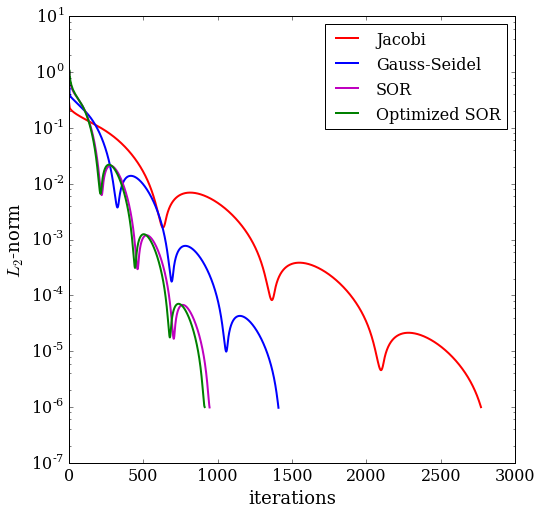

In [35]:
pyplot.figure(figsize=(8,8))
pyplot.xlabel(r'iterations', fontsize=18)
pyplot.ylabel(r'$L_2$-norm', fontsize=18)
pyplot.semilogy(numpy.trim_zeros(l1_diff_psiJ,'b'),
                'r-', lw=2, label='Jacobi')
pyplot.semilogy(numpy.trim_zeros(l1_diff_psiGS,'b'), 
                'b-', lw=2, label='Gauss-Seidel')
pyplot.semilogy(numpy.trim_zeros(l1_diff_psiSOR,'b'), 
                'm-', lw=2, label='SOR')
pyplot.semilogy(numpy.trim_zeros(l1_diff_psiTSOR,'b'), 
                'g-', lw=2, label='Optimized SOR')
pyplot.legend(fontsize=16);

##### BONUS

In [36]:
from matplotlib import animation
from IPython.display import HTML

In [37]:
nx = 41
ny = 41
l = 1.
h = 1.
d = l/(nx-1)    #delta
l1_target =1e-6

#Conditions initiales
psi = numpy.zeros((ny,nx))
om  = numpy.zeros((ny,nx))

# Bord supérieur
om[-1,:] = -0.5/(d**2)*(8*psi[-2,:]-psi[-3,:])-(3/d) 
                                                                       
# Bord inférieur
om[0,:] = -0.5/(d**2)*(8*psi[1,:]-psi[2,:])

# Bord droit
om[:,-1] = -0.5/(d**2)*(8*psi[:,-2]-psi[:,-3])
        
# Bord gauche
om[:,0] = -0.5/(d**2)*(8*psi[:,1]-psi[:,2])


#Aide au traçage
x = numpy.linspace(0,l,nx)
y = numpy.linspace(0,h,ny)

In [38]:
psi, om, iterations, l1_conv= jacobi(om.copy(), psi.copy(), d, l1_target)

print("La méthode de Jacobi prend {} itérations à la tolérance {}".format(iterations, l1_target))

La méthode de Jacobi prend 2771 itérations à la tolérance 1e-06


In [39]:
print(len(l1_conv))
for i in range(2770):
    if l1_conv[i]<l1_conv[i+1]:
        print(i)
print(l1_conv[633])

2771
0
1
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741
742
743
744
745
746
747
748
749
750
751
752
753
754
755
756
757
758
759
760
761
762
763
764
765
766
767
768
769
770
771
772
773
774
775
776
777
778
779
780
781
782
783
784
785
786
787
788
789
790
791
792
793
794
795
796
797
798
799
800
801
802
803
804
805
806
807
808
809
810
811
812
813
814
815
1364
1365
1366
1367
1368
1369
1370
1371
1372
1373
1374
1375
1376
1377
1378
1379
1380
1381
1382
1383
1384
1385
1386
1387
1388
1389
1390
1391
1392
1393
1394
1395
1396
1397
1398
1399
1400
1401
1402
1403
1404
1405
1406
1407
1408
1409
1410
1411
1412
1413
1414
1415

In [40]:
nx = 41
ny = 41
l = 1.
h = 1.
d = l/(nx-1)    #delta
l1_target =0.00164224726317

#Conditions initiales
psi = numpy.zeros((ny,nx))
om  = numpy.zeros((ny,nx))

# Bord supérieur
om[-1,:] = -0.5/(d**2)*(8*psi[-2,:]-psi[-3,:])-(3/d) 
                                                                       
# Bord inférieur
om[0,:] = -0.5/(d**2)*(8*psi[1,:]-psi[2,:])

# Bord droit
om[:,-1] = -0.5/(d**2)*(8*psi[:,-2]-psi[:,-3])
        
# Bord gauche
om[:,0] = -0.5/(d**2)*(8*psi[:,1]-psi[:,2])


#Aide au traçage
x = numpy.linspace(0,l,nx)
y = numpy.linspace(0,h,ny)

In [41]:
psi, om, iterations, l1_conv= jacobi(om.copy(), psi.copy(), d, l1_target)

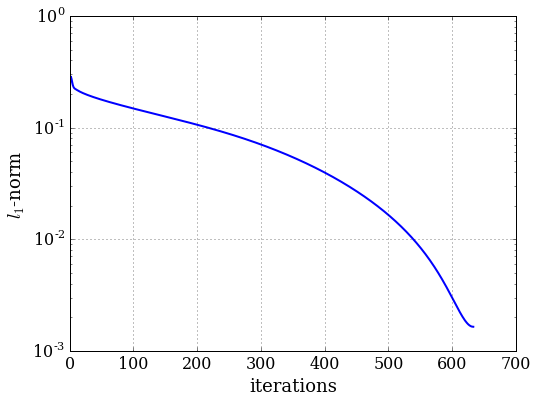

In [42]:
pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r'iterations', fontsize=18)
pyplot.ylabel(r'$l_1$-norm', fontsize=18)
pyplot.semilogy(numpy.arange(len(l1_conv)), l1_conv, lw=2, color='b');

In [43]:
nx = 41
ny = 41
l = 1.
h = 1.
d = l/(nx-1)    #delta
l1_target =1e-6

#Conditions initiales
psi = numpy.zeros((ny,nx))
om  = numpy.zeros((ny,nx))

# Bord supérieur
om[-1,:] = -0.5/(d**2)*(8*psi[-2,:]-psi[-3,:])-(3/d) 
                                                                       
# Bord inférieur
om[0,:] = -0.5/(d**2)*(8*psi[1,:]-psi[2,:])

# Bord droit
om[:,-1] = -0.5/(d**2)*(8*psi[:,-2]-psi[:,-3])
        
# Bord gauche
om[:,0] = -0.5/(d**2)*(8*psi[:,1]-psi[:,2])


#Aide au traçage
x = numpy.linspace(0,l,nx)
y = numpy.linspace(0,h,ny)

In [44]:
def jacobi_anim(om, psi, d, l1_target):
    '''Résoud itérativement le système d'équations formé par l'équation de
    Laplace pour omega et l'équation de Poisson pour psi en utilisant la
    méthode de Jacobi.
    
    Paramètres:
    ----------
    om: Tableau à 2D de float ("nombre à virgule flottante")
        distribution initiale de la voriticité omega
    psi: Tableau à 2D de float
        distribution initiale de la fonction de courant psi
    l1_target: float 
        Objectif pour la différence entre deux solutions consécutives
        (critère d'arrêt)
    d: float
        intervalle entre deux points de notre réseau de points
        
    Retournes:
    -------
    om: Tableau à 2D de float
        Distribution de omega après relaxation.
    '''
    
    norme_om = 1
    norme_psi = 1
    omn = numpy.empty_like(om)
    psid = numpy.empty_like(psi)
    iterations = 0
    l1_conv=[]
    psi_ite = numpy.empty(2771,dtype=numpy.ndarray)
    
    while norme_psi > l1_target and norme_om > l1_target:
        omn = om.copy()
        psid = psi.copy()
        
        # On calcul nos nouvelles valeurs de omega
        om[1:-1,1:-1] = 0.25 * (omn[1:-1,2:] + omn[1:-1, :-2]\
                             + omn[2:, 1:-1] + omn[:-2, 1:-1])
    
        
        # On impose les conditions aux bords de Neumann
        om[-1,:] = -0.5/(d**2)*(8*psi[-2,:]-psi[-3,:])-(3/d)  # Bord supérieur
        om[0,:] = -0.5/(d**2)*(8*psi[1,:]-psi[2,:])           # Bord inférieur
        om[:,-1] = -0.5/(d**2)*(8*psi[:,-2]-psi[:,-3])        # Bord droit
        om[:,0] = -0.5/(d**2)*(8*psi[:,1]-psi[:,2])           # Bord gauche
        
        # On calcul nos nouvelles valeurs de psi
        psi[1:-1,1:-1] = 0.25 * (psid[1:-1,2:] + psid[1:-1,:-2]\
                              + psid[2:,1:-1] + psid[:-2,1:-1]\
                              + om[1:-1,1:-1] * d**2)

        #Sélectionne et sauvegarde la valeur de psi
        psi_ite[iterations] = psi.copy()
        
        
        #Calcul et sauvegarde des normes
        norme_psi = L1norm(psi,psid)
        norme_om  = L1norm(om,omn)
        iterations += 1
        l1_conv.append(norme_psi)

    return psi_ite

In [45]:
p = jacobi_anim(om.copy(), psi.copy(), d, l1_target)

In [46]:
p.shape

(2771,)

In [47]:
# Sélectionne et copie un tableau tout les 100 pas 

p_ite = numpy.empty(2771,dtype=numpy.ndarray)

for i in range (2771):
    if i in numpy.arange(0,2771,10):
        p_ite[int(i/10)] = p[i].copy()

In [48]:
p_ite.shape

(2771,)

In [53]:
fig = pyplot.figure(figsize=(8,7));
pyplot.title("système 633itérations", fontsize = 18)
ims = []


for i in range(270):
    im = pyplot.imshow(p_ite[i], cmap= cm.viridis, animated=True)
    ims.append([im])

pyplot.close()    
anim = animation.ArtistAnimation(fig, ims, interval=10, blit=True)
HTML(anim.to_html5_video())

---

##### . Sources
---

Méthode SPH:

http://onlinelibrary.wiley.com/doi/10.1002/fld.4196/full

---
###### La cellule ci-dessous charge le style du notebook.

In [50]:
from IPython.core.display import HTML
css_file = '../styles/numericalmoocstyle.css'
HTML(open(css_file, "r").read())